In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/sample_data/Student_performance_data _.csv')
X = dataset[['StudyTimeWeekly', 'Absences', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports']]
X.head()

,StudyTimeWeekly,Absences,ParentalSupport,Tutoring,Extracurricular,Sports
0,19.833723,7,2,1,0,0
1,15.408756,0,1,0,0,0
2,4.210570,26,2,0,0,0
3,10.028829,14,3,0,1,0
4,4.672495,17,3,1,0,0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
X['Cluster'] = kmeans.labels_
X.head()

/tmp/ipython-input-320688289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


,StudyTimeWeekly,Absences,ParentalSupport,Tutoring,Extracurricular,Sports,Cluster
0,19.833723,7,2,1,0,0,2
1,15.408756,0,1,0,0,0,2
2,4.210570,26,2,0,0,0,0
3,10.028829,14,3,0,1,0,2
4,4.672495,17,3,1,0,0,0


In [ ]:
new_student = pd.DataFrame(
    [[10, 3, 2, 1, 1, 0]],
    columns=X.drop(columns=['Cluster']).columns   # exclude 'Cluster' column
)

print(f"The predicted cluster of the new student is cluster number: {kmeans.predict(new_student)}")

The predicted cluster of the new student is cluster number: [2]


In [ ]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"Inertia (Sum of Squared Distances): {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

Inertia (Sum of Squared Distances): 93116.23741098423
Silhouette Score: 0.3769491993021217


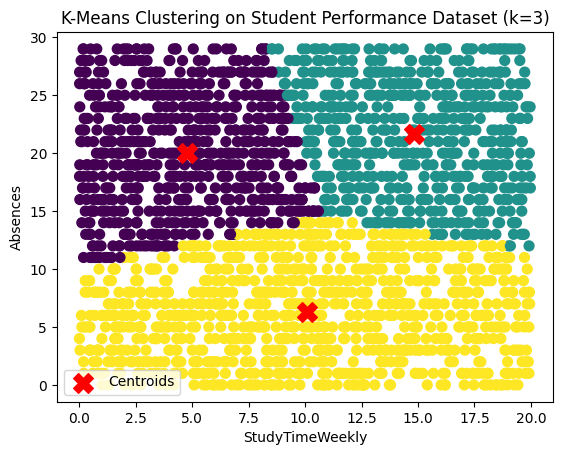

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:, 0], X.iloc[:, 1],
            c=kmeans.labels_, s=50)

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200,
            label='Centroids')

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("K-Means Clustering on Student Performance Dataset (k=3)")
plt.legend()
plt.show()

**K‑Means clustering was applied to the students performance dataset.**

**k = 3**

***The results of these settings were:***


> Inertia = 93116.237
> Silhouette = 0.37